In [2]:
##PERFORM UPSAMPLING AND USE DIFFERENT INTERPOLATION AND PERFORM DOWNSAMPLING AND DO VISUALIZE THE SUMMARY ON GROUPED DATA

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime

<ipython-input-40-d3e30fb8ed31>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [8]:
time1=pd.date_range(start="2023-01-01",end="2023-01-02",freq="5min")

In [9]:
series1=pd.Series(range(len(time1)),index=time1)

In [10]:
series1

2023-01-01 00:00:00      0
2023-01-01 00:05:00      1
2023-01-01 00:10:00      2
2023-01-01 00:15:00      3
2023-01-01 00:20:00      4
                      ... 
2023-01-01 23:40:00    284
2023-01-01 23:45:00    285
2023-01-01 23:50:00    286
2023-01-01 23:55:00    287
2023-01-02 00:00:00    288
Freq: 5T, Length: 289, dtype: int64

In [11]:
series1.count()

289

In [12]:
upsampling=series1.resample('1min').asfreq()

In [13]:
upsampling

2023-01-01 00:00:00      0.0
2023-01-01 00:01:00      NaN
2023-01-01 00:02:00      NaN
2023-01-01 00:03:00      NaN
2023-01-01 00:04:00      NaN
                       ...  
2023-01-01 23:56:00      NaN
2023-01-01 23:57:00      NaN
2023-01-01 23:58:00      NaN
2023-01-01 23:59:00      NaN
2023-01-02 00:00:00    288.0
Freq: T, Length: 1441, dtype: float64

In [14]:
upsampling.head(10)

2023-01-01 00:00:00    0.0
2023-01-01 00:01:00    NaN
2023-01-01 00:02:00    NaN
2023-01-01 00:03:00    NaN
2023-01-01 00:04:00    NaN
2023-01-01 00:05:00    1.0
2023-01-01 00:06:00    NaN
2023-01-01 00:07:00    NaN
2023-01-01 00:08:00    NaN
2023-01-01 00:09:00    NaN
Freq: T, dtype: float64

In [17]:
upsampling.count()

289

In [19]:
time2=pd.date_range(start="2023-01-01",end="2023-01-02",freq="1min")

In [20]:
series2=pd.Series(range(len(time2)),index=time2)

In [22]:
series2

2023-01-01 00:00:00       0
2023-01-01 00:01:00       1
2023-01-01 00:02:00       2
2023-01-01 00:03:00       3
2023-01-01 00:04:00       4
                       ... 
2023-01-01 23:56:00    1436
2023-01-01 23:57:00    1437
2023-01-01 23:58:00    1438
2023-01-01 23:59:00    1439
2023-01-02 00:00:00    1440
Freq: T, Length: 1441, dtype: int64

In [24]:
downsampling=series2.resample("5min").asfreq()

In [25]:
downsampling

2023-01-01 00:00:00       0
2023-01-01 00:05:00       5
2023-01-01 00:10:00      10
2023-01-01 00:15:00      15
2023-01-01 00:20:00      20
                       ... 
2023-01-01 23:40:00    1420
2023-01-01 23:45:00    1425
2023-01-01 23:50:00    1430
2023-01-01 23:55:00    1435
2023-01-02 00:00:00    1440
Freq: 5T, Length: 289, dtype: int64

In [26]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"

In [27]:
data=pd.read_csv(url,parse_dates=['Month'])

In [28]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [29]:
data.set_index("Month",inplace=True)

In [30]:
data.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [32]:
data.count()

Sales    36
dtype: int64

<Axes: xlabel='Month'>

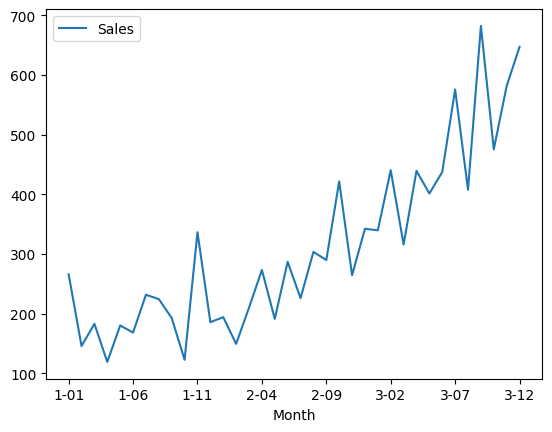

In [33]:
data.plot()

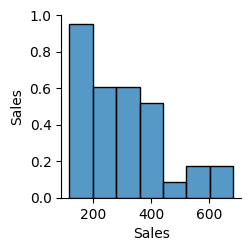

In [34]:
sns.pairplot(data)

In [36]:
def parser(x):
  return datetime.strptime('190'+x,'%Y-%m')

In [41]:
series=pd.read_csv(url,header=0,parse_dates=[0],index_col=0,date_parser=parser)

In [42]:
series

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


from matplotlib import pyplot as plt
series['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
series['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Month'>

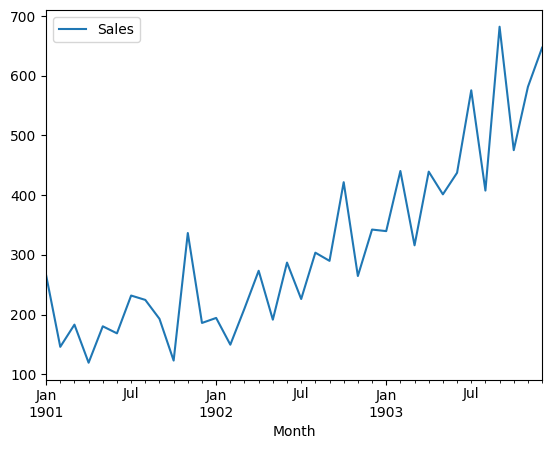

In [43]:
series.plot()

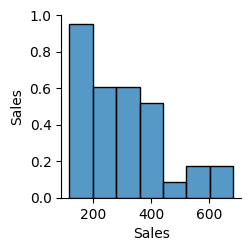

In [44]:
sns.pairplot(series)

In [45]:
upsample=series.resample('D')
interpolated=upsample.interpolate(method='linear')
interpolated

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [48]:
interpolated=upsample.interpolate(method='spline',order=2)
interpolated

,Sales
Month,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746
...,...
1903-11-27,645.060131
1903-11-28,645.754167
1903-11-29,646.316013


<Axes: xlabel='Month'>

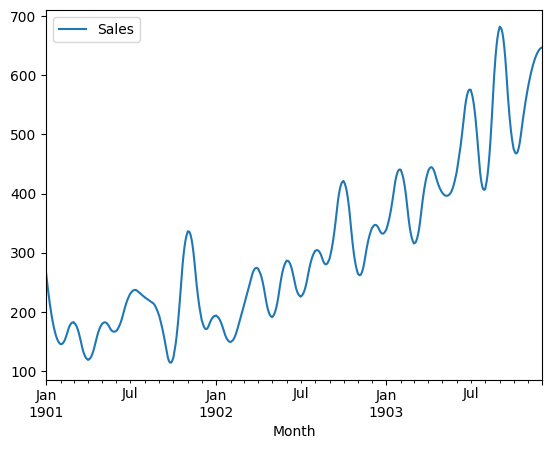

In [49]:
interpolated.plot()

In [52]:
downsample=series.resample("Q")

In [55]:
quarter=downsample.mean()

In [56]:
quarter

,Sales
Month,
1901-03-31,198.333333
1901-06-30,156.033333
1901-09-30,216.366667
1901-12-31,215.100000
1902-03-31,184.633333
1902-06-30,250.566667
1902-09-30,273.166667
1902-12-31,342.800000
1903-03-31,365.333333


<Axes: xlabel='Month'>

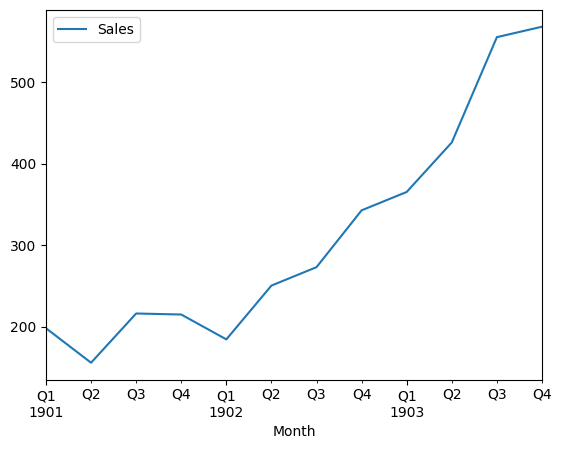

In [57]:
quarter.plot()

In [61]:
resample=series.resample("A")
annual=resample.sum()

In [62]:
annual

,Sales
Month,
1901-12-31,2357.5
1902-12-31,3153.5
1903-12-31,5742.6


<Axes: xlabel='Month'>

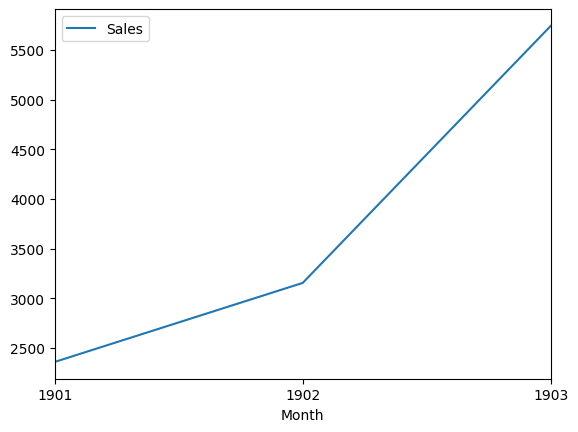

In [63]:
annual.plot()